In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [3]:
#Reading CSV file data
my_data=pd.read_csv('data/convex_image_data.csv')

In [4]:
my_data.head()

,Filename,Label,Format
0,Cov_Oliviera_2020_Fig5A,covid,jpg
1,Cov_Oliviera_2020_Fig4A,covid,jpg
2,Cov_Oliviera_2020_Fig15A,covid,jpg
3,Cov_severe_acutemedicine,covid,png
4,Cov_unsmooth_pleuralline_prelim_study_SSRN_paper2,covid,png


In [5]:
#Setting path for our convex image dataset
images_path='convex/'

In [6]:
#Converting our data into a numpy array to be able to access it more freely
data_array=my_data.to_numpy()

# Image preProcessing

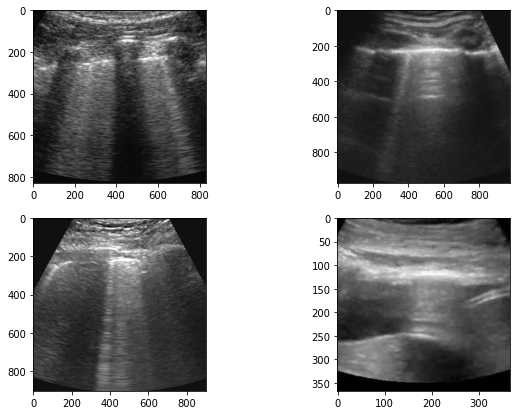

In [11]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
j=1
for i in data_array:
    if(j==5):
        break
    img = cv2.imread(images_path+i[0]+'.'+i[2], cv2.IMREAD_GRAYSCALE)
    fig.add_subplot(rows, columns, j)
    j+=1
    plt.imshow(img,cmap='gray')
    
    

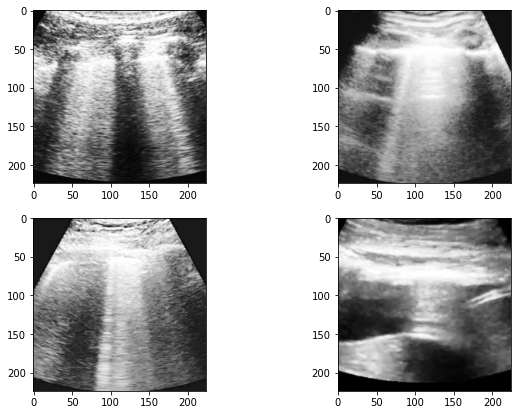

In [13]:
#Increasing Images contrast- resizing images to 224x224 - Incrasing Image contrast
images_data=[]
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
j=1
for i in data_array:
    if(j==5):
        break
    img = cv2.imread(images_path+i[0]+'.'+i[2], cv2.IMREAD_GRAYSCALE)
    img=cv2.equalizeHist(img)
    img=cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    fig.add_subplot(rows, columns, j)
    j+=1
    plt.imshow(img, cmap='gray')
    img_1d=img.reshape(224*224)
    images_data.append(img_1d)

In [28]:
images_data

[array([10, 10, 10, ..., 14, 15, 15], dtype=uint8),
 array([10, 10, 10, ..., 14, 15, 15], dtype=uint8),
 array([27, 27, 27, ..., 27, 27, 27], dtype=uint8),
 array([4, 5, 5, ..., 0, 0, 0], dtype=uint8),
 array([72, 72, 72, ..., 72, 72, 72], dtype=uint8),
 array([0, 0, 0, ..., 1, 2, 4], dtype=uint8),
 array([ 0,  0,  0, ..., 14, 13, 16], dtype=uint8),
 array([  0,   0,   0, ..., 152, 153, 158], dtype=uint8),
 array([  0,   0,   0, ..., 136, 159, 166], dtype=uint8),
 array([  0,   0,   0, ..., 126, 124, 117], dtype=uint8),
 array([50, 50, 50, ..., 50, 50, 50], dtype=uint8),
 array([ 0,  0,  0, ..., 54, 50, 46], dtype=uint8),
 array([ 0,  0,  0, ..., 68, 67, 67], dtype=uint8),
 array([26, 26, 26, ..., 26, 26, 26], dtype=uint8),
 array([0, 0, 0, ..., 2, 4, 5], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtyp

### Initializing our X and y

In [44]:
#Initializing our X and y for our model
X=np.asarray(images_data)
y=np.asarray(my_data['Label'])

In [45]:
X.shape

(29, 50176)

In [46]:
y.shape

(29,)

In [32]:
# Splitting our set to Train and test  80 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape

(23, 50176)

In [48]:
y_train_covid = (y_train=='covid')
y_test_covid = (y_test=='covid')

# SGD Model

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn import metrics

In [50]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit( X_train, y_train_covid)

SGDClassifier(random_state=42)

In [57]:
#Cross validation
cross_validate(sgd_clf,X_train,y_train_covid,cv=4,scoring="accuracy")

{'fit_time': array([0.02097082, 0.02792454, 0.01533914, 0.01994777]),
 'score_time': array([0.00099754, 0.00213909, 0.00099683, 0.00199318]),
 'test_score': array([0.66666667, 0.83333333, 0.66666667, 0.8       ])}

In [58]:
#getting our y_predict for our confusion matrix
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_covid,cv=5)

In [60]:
#Getting the confusion matrix using y-predict
confusion_matrix(y_train_covid,y_train_predict)

array([[18,  0],
       [ 2,  3]], dtype=int64)

In [62]:
#It is often convinient to combine precision and recall in a metric called F1
f1_score(y_train_covid,y_train_predict)

0.7499999999999999

# Binary SVM Model

In [63]:
#Trying out support vector machine model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=42))

In [64]:
svm_clf.fit(X_train, y_train_covid)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=42))])

In [67]:
# cross validation
cross_validate(svm_clf,X_train,y_train_covid,cv=3,scoring="accuracy")

{'fit_time': array([0.05385685, 0.04587722, 0.04587793]),
 'score_time': array([0.01595712, 0.01595736, 0.01495886]),
 'test_score': array([0.75      , 0.75      , 0.85714286])}

In [68]:
y_train_predict_2=cross_val_predict(svm_clf,X_train,y_train_covid,cv=4)

In [69]:
confusion_matrix(y_train_covid,y_train_predict_2)

array([[18,  0],
       [ 3,  2]], dtype=int64)

In [70]:
f1_score(y_train_covid,y_train_predict_2)

0.5714285714285715